In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykalman import KalmanFilter

In [2]:
prices=pd.read_csv(r"C:\Users\li_wn\Documents\Research\premia.csv",header=0,parse_dates=[0],index_col=0)

In [3]:
prices.head()

,Aristotle SMID Cap Core SMA,R.1000 G,R.1000 V,R.MidCap G,R.MidCap V,R.2000 G,R.2000 V,MSCI EAFE,MSCI EM,US Treasury 1-3,US Treasury 7-10,IG USA,HY USA,IG EUR,HY EUR,EM Corp,BofA Muni
Index,,,,,,,,,,,,,,,,,
2010-10-31,3.944758,4.670658,2.895258,3.806058,3.727258,4.197258,3.768158,3.513958,2.806958,0.113758,-0.167242,0.104758,2.319758,-0.242242,1.851758,0.879758,-0.140242
2010-11-30,2.362825,1.064225,-0.626275,3.181425,0.415025,4.261125,2.446325,-4.866375,-2.730775,-0.278175,-0.888175,-0.952175,-1.213175,-1.297175,-4.172175,-1.474175,-0.811175
2010-12-31,8.827825,5.383925,7.767725,6.106625,7.422525,7.482325,8.186825,7.987425,7.177325,-0.309175,-3.565175,-1.070175,1.638825,-0.500175,1.993825,0.152825,-0.985175
2011-01-31,0.952833,2.377733,2.094733,1.827933,2.081633,-0.724467,-0.112667,2.203933,-2.922067,-0.000167,-0.079167,0.069833,1.934833,-0.627167,2.190833,0.270833,-0.341167
2011-02-28,3.948275,3.110875,3.527675,3.883775,3.416175,5.717775,4.915875,3.179075,-1.141225,-0.248725,-0.394725,0.547275,1.175275,0.591275,1.710275,0.304275,0.728275


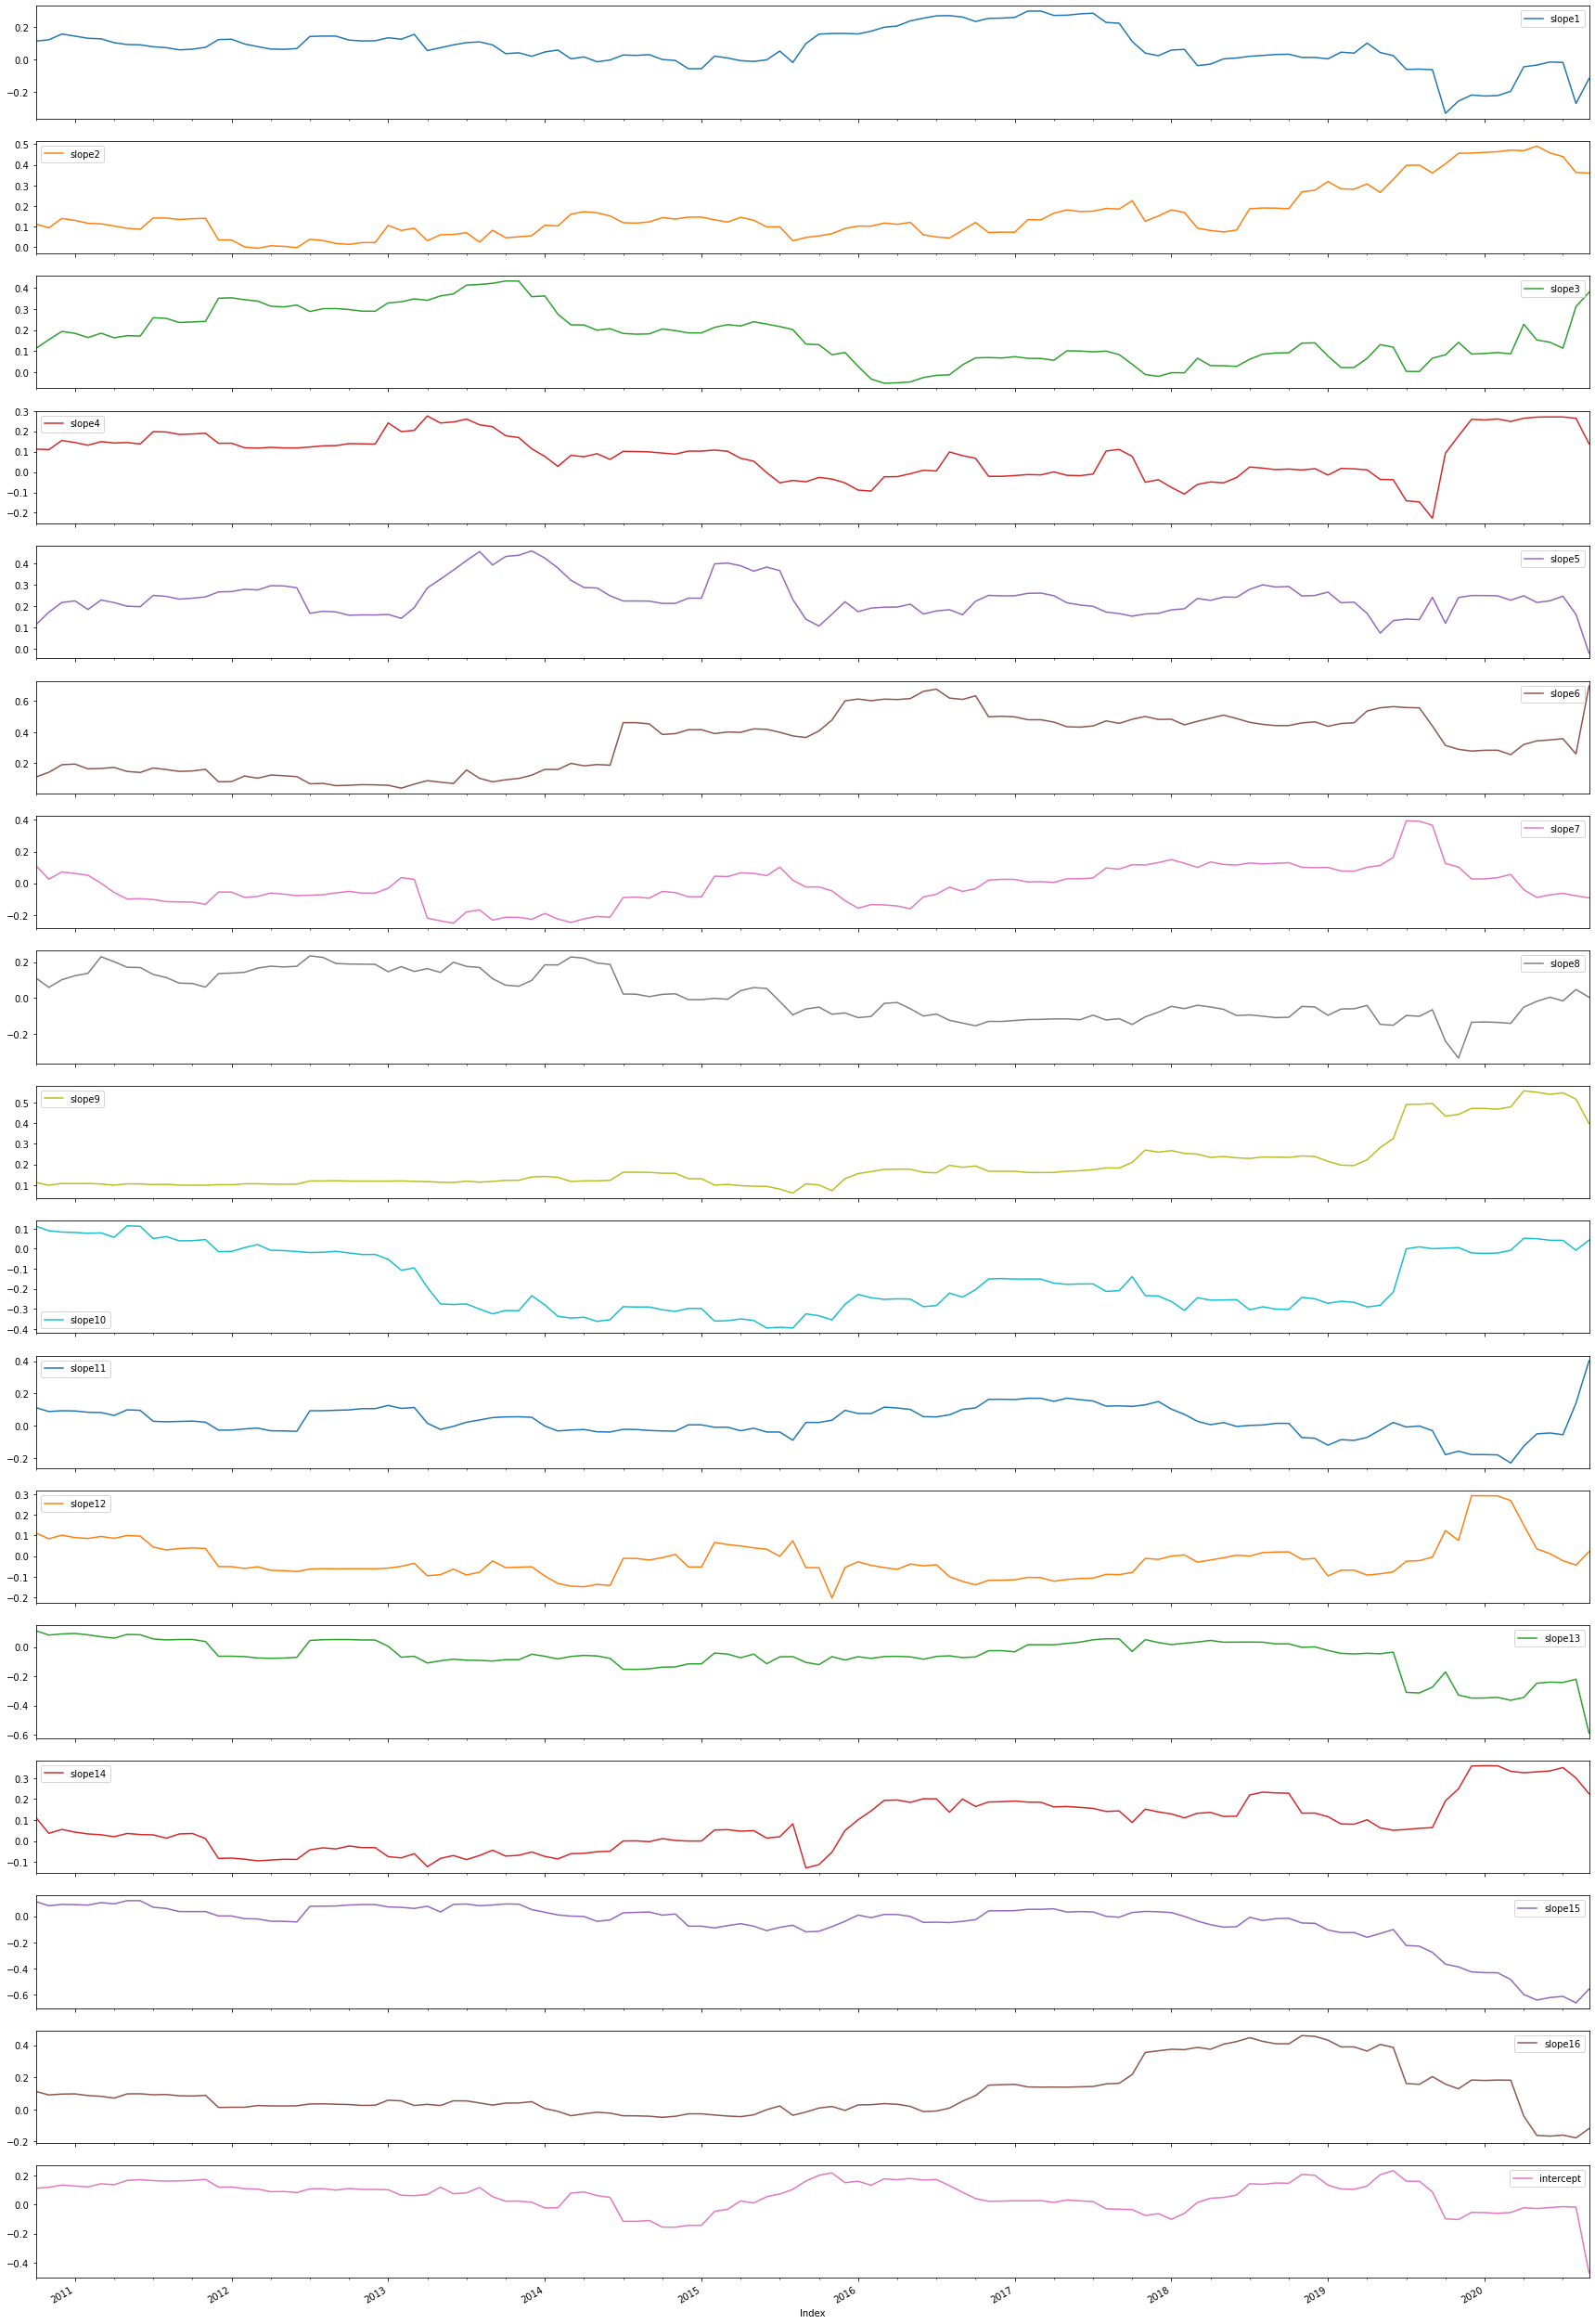

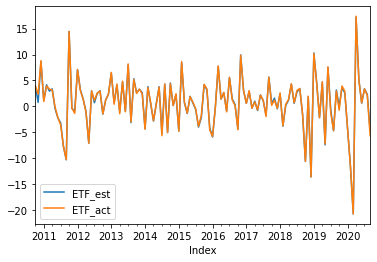

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykalman import KalmanFilter

if __name__ == "__main__":
    #file_name = 'KalmanExample.txt'
    #df = pd.read_csv(file_name, index_col = 0)
    #prices = df[['ETF', 'ASSET_1', 'ASSET_2']]
    delta = 0.01#1e-3
    trans_cov = delta / (1 - delta) * np.eye(17) #np.eye(3)
    obs_mat = np.vstack([prices.iloc[:,1],prices.iloc[:,2],prices.iloc[:,3],prices.iloc[:,4],
                        prices.iloc[:,5],prices.iloc[:,6],prices.iloc[:,7],prices.iloc[:,8],
                        prices.iloc[:,9],prices.iloc[:,10],prices.iloc[:,11],prices.iloc[:,12],
                        prices.iloc[:,13],prices.iloc[:,14],prices.iloc[:,15],prices.iloc[:,16],
                        np.ones(prices.iloc[:,1].shape)]).T[:, np.newaxis]
    #np.ones(prices.iloc[:,1].shape)
    kf = KalmanFilter(
        n_dim_obs=1,
        n_dim_state=17,
        initial_state_mean=np.zeros(17),
        initial_state_covariance=np.ones((17, 17)),
        transition_matrices=np.eye(17),
        observation_matrices=obs_mat,
        observation_covariance=1.0,
        transition_covariance=trans_cov        
    )

    # state_means, state_covs = kf.em(prices['ETF'].values).smooth(prices['ETF'].values)
    state_means, state_covs = kf.filter(prices.iloc[:,0].values)


    # Re-construct ETF from coefficients and 'ASSET_1' and ASSET_2 values:
    ETF_est = np.array([a.dot(b) for a, b in zip(np.squeeze(obs_mat), state_means)])

    # Draw slope and intercept...
    pd.DataFrame(
        dict(
            slope1=state_means[:, 0],
            slope2=state_means[:, 1],
            slope3=state_means[:,2],
            slope4=state_means[:,3],
            slope5=state_means[:,4],
            slope6=state_means[:,5],
            slope7=state_means[:,6],
            slope8=state_means[:,7],
            slope9=state_means[:,8],
            slope10=state_means[:,9],
            slope11=state_means[:,10],
            slope12=state_means[:,11],
            slope13=state_means[:,12],
            slope14=state_means[:,13],
            slope15=state_means[:,14],
            slope16=state_means[:,15],
            intercept=state_means[:, 16],
        ), index=prices.index
    ).plot(subplots=True,figsize=(30, 50))
    #plt.figure(figsize=(30, 30))
    plt.show()
    tt=pd.DataFrame(
        dict(
            slope1=state_means[:, 0],
            slope2=state_means[:, 1],
            slope3=state_means[:,2],
            slope4=state_means[:,3],
            slope5=state_means[:,4],
            slope6=state_means[:,5],
            slope7=state_means[:,6],
            slope8=state_means[:,7],
            slope9=state_means[:,8],
            slope10=state_means[:,9],
            slope11=state_means[:,10],
            slope12=state_means[:,11],
            slope13=state_means[:,12],
            slope14=state_means[:,13],
            slope15=state_means[:,14],
            slope16=state_means[:,15],
            intercept=state_means[:, 16],
        ), index=prices.index
    )
    tt.to_excel(r"C:\Users\li_wn\Documents\Research\kalman_noCon.xlsx",index=True,header=True)
    # Draw actual y, and estimated y:
    pd.DataFrame(
        dict(
            ETF_est=ETF_est,
            ETF_act=prices.iloc[:,0].values#prices['ETF'].values
        ), index=prices.index
    ).plot()
    plt.show()

In [19]:
nn=len(tt)-1
tt.iloc[nn,:]

slope1      -0.117175
slope2       0.359948
slope3       0.378533
slope4       0.138768
slope5      -0.021165
slope6       0.695234
slope7      -0.092569
slope8       0.005012
slope9       0.398447
slope10      0.042615
slope11      0.402798
slope12      0.021923
slope13     -0.587702
slope14      0.224834
slope15     -0.555836
slope16     -0.119353
intercept   -0.469678
Name: 2020-09-30 00:00:00, dtype: float64